In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

In [2]:
def fhill(x,a=1,n=1):
    return x**n/(a**n+x**n)

In [3]:
XHILL=np.linspace(0,5,50)
atarget=2.5; ntarget=4
YHILL=fhill(XHILL,atarget,ntarget)
n=25
xs=np.linspace(0,5,n)
ys=fhill(xs,atarget,ntarget)+np.random.normal(0,.1,n)
x,y=np.array([(x,y) for (x,y) in zip (xs,ys) if y>0]).T
n=len(x)
print("There are",n,"data points")

There are 24 data points


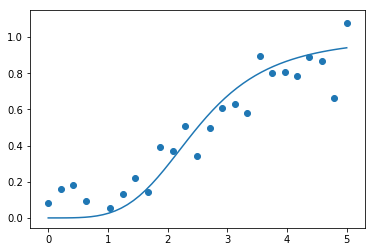

In [4]:
plt.plot(XHILL,YHILL)
plt.scatter(x,y)

In [5]:
parameters,covmatrix=curve_fit(fhill,x,y,p0=(1,1))

In [6]:
afit,nfit=parameters
asig,nsig = np.sqrt(np.diag(covmatrix))
print("Predicted a = ",round(afit,2),"+/-",round(1.96*asig,2))
print("Predicted n = ",round(nfit,2),"+/-",round(1.96*nsig,2))

Predicted a =  2.52 +/- 0.22
Predicted n =  2.92 +/- 0.77


In [7]:
covmatrix

array([[0.0131753 , 0.01160747],
       [0.01160747, 0.15550944]])

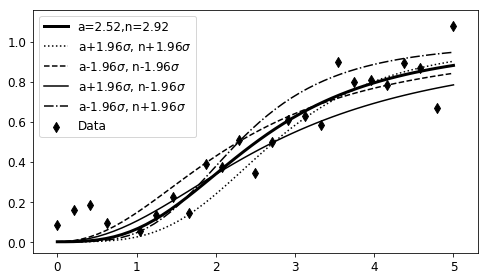

In [8]:
plt.plot(XHILL, fhill(XHILL,afit,nfit),c="k",lw=3,label="a="+str(round(afit,2))+",n="+str(round(nfit,2)))
plt.plot(XHILL, fhill(XHILL, afit+1.96*asig,nfit+1.96*nsig),c="k",ls=":", label="a+1.96$\sigma$, n+1.96$\sigma$")
plt.plot(XHILL, fhill(XHILL, afit-1.96*asig,nfit-1.96*nsig),c="k",ls="--",label="a-1.96$\sigma$, n-1.96$\sigma$")
#plt.plot(XHILL, fhill(XHILL, afit, nfit+1.96*nsig))
plt.plot(XHILL, fhill(XHILL, afit+1.96*asig, nfit-1.96*nsig),c="k",ls="-",label="a+1.96$\sigma$, n-1.96$\sigma$")

plt.plot(XHILL, fhill(XHILL, afit-1.96*asig, nfit+1.96*nsig),c="k",ls="-.",label="a-1.96$\sigma$, n+1.96$\sigma$")
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 12)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 12)
plt.scatter(x,y,s=50,marker="d",c="k",label="Data")
plt.legend(fontsize=12)
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(7,4)
fig.savefig("hill-function-fit.pdf")


In [9]:
def Ehill(a,n):
    return sum((fhill(xi,a,n)-yi)**2 for (xi,yi) in zip(x,y))

In [10]:
EScape=[[Ehill(a,n) for a in np.linspace(0,5,50)] for n in np.linspace(0,5,50)]

/home/mathman/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  


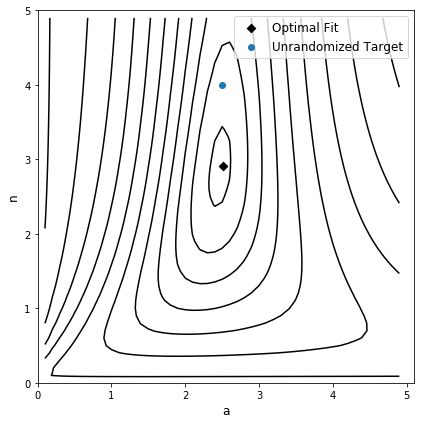

In [11]:
cp=plt.contour(EScape, levels=np.logspace(-1, 1, 15),colors="k")
plt.xlim(0,51)
plt.xticks(range(0,51,10),range(0,6));
plt.ylim(0,41)
plt.yticks(range(0,51,10),range(0,6));
plt.xlabel("a",fontsize=12)
plt.ylabel("n",fontsize=12)
plt.scatter(10*afit,10*nfit,marker="D",c="k", label="Optimal Fit")
plt.scatter(10*atarget,10*ntarget, label="Unrandomized Target")
plt.legend(fontsize=12)
fig=plt.gcf()
fig.set_size_inches(6,6)
#plt.colorbar(cp)
fig.tight_layout()
fig.savefig("Escape-hill.pdf")

In [27]:
import pandas as pd
np.exp(.3)

1.3498588075760032

In [262]:
data=pd.read_csv("us-population.txt")
X= np.array(data["Year"])
Y=np.array(data["Population"])
n=len(X)
print(data)

    Year  Population
0   1790        3929
1   1800        5308
2   1810        7239
3   1820        9638
4   1830       12866
5   1840       17069
6   1850       23191
7   1860       31433
8   1870       38558
9   1880       50189
10  1890       62979
11  1900       76212
12  1910       92228
13  1920      106021
14  1930      123202
15  1940      132164
16  1950      151325
17  1960      179323
18  1970      203302
19  1980      226542
20  1990      248709


In [268]:
def f(x,a=1,b=1):
    return np.exp(a+b*(x-1790))
parameters,covmatrix=curve_fit(f, X,Y,p0=(1,1))
a,b=parameters

siga=covmatrix[0,0]**.5
sigb=covmatrix[1,1]**.5
print("a=",round(a,3),"+/-",round(1.96*siga,3))
print("b=",round(b,3),"+/-",round(1.96*sigb,3))

#print("covmatrix=",covmatrix)
lsfit=f(X,*parameters)
print("MSE=",sum((Y-lsfit)**2)/n)

a= 9.548 +/- 0.201
b= 0.015 +/- 0.001
MSE= 90900652.15033811


In [270]:
M,B=np.polyfit(X,np.log(Y),1)
print("slope =   ",round(M,3))
print("intercept=",round(B,3))
logfit=np.exp(M*X+B)
print("MSE =     ",sum((Y-logfit)**2)/n)

slope =    0.021
intercept= -28.505
MSE =      1193297724.9124706


<function matplotlib.pyplot.grid(b=None, which='major', axis='both', **kwargs)>

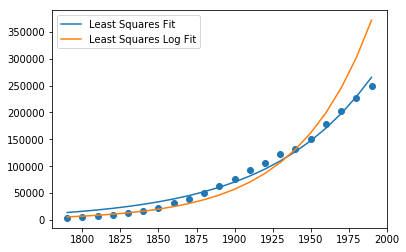

In [208]:
plt.scatter(X,Y)
plt.plot(X,lsfit,label="Least Squares Fit")
plt.plot(X,logfit, label="Least Squares Log Fit")
plt.legend()
#plt.yscale("log")
plt.grid 

In [272]:
1193297724.9124706/90900652.15033811

13.127493551299368